<a href="https://colab.research.google.com/github/phungthibacha/Python_Retail-Strategy-and-Analytics/blob/main/Quantium_Virtual_Internship_Retail_Strategy_and_Analytics_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas
import pandas as pd
import numpy as np
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

Step 1: Exploratory data analysis

In [ ]:
#First, we need to understand the data
# Examining transaction data
df_transactions = pd.read_excel('QVI_transaction_data.xlsx')
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
df_transactions.shape
#The dataset contains 264836 rows, 8 columns

(264836, 8)

In [ ]:
df_transactions.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [ ]:
#We want to understand the data type of each columns
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
# We can see that the date column is in an integer format. Let's change this to a date format.
origin = pd.Timestamp("30/12/1899")
df_transactions["DATE"] = df_transactions["DATE"].apply(lambda x: origin + pd.Timedelta(days=x))
df_transactions.head()

<ipython-input-6-3d8bb7404e22>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  origin = pd.Timestamp("30/12/1899")


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# We have a look of Product name column:
#They contain both product name, company name and package size in this column
df_transactions.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [ ]:
#We only focus on Chips products, so let's dig deeper to see if we have other products than chips
# Examine the words in PROD_NAME to see if there are any incorrect entries
#such as products that are not chips

#First, we need to standardize the text for easier analyze
df_transactions.PROD_NAME = df_transactions.PROD_NAME.str.lower()
df_transactions.PROD_NAME.unique()

array(['natural chip        compny seasalt175g',
       'ccs nacho cheese    175g',
       'smiths crinkle cut  chips chicken 170g',
       'smiths chip thinly  s/cream&onion 175g',
       'kettle tortilla chpshny&jlpno chili 150g',
       'old el paso salsa   dip tomato mild 300g',
       'smiths crinkle chips salt & vinegar 330g',
       'grain waves         sweet chilli 210g',
       'doritos corn chip mexican jalapeno 150g',
       'grain waves sour    cream&chives 210g',
       'kettle sensations   siracha lime 150g',
       'twisties cheese     270g', 'ww crinkle cut      chicken 175g',
       'thins chips light&  tangy 175g', 'ccs original 175g',
       'burger rings 220g', 'ncc sour cream &    garden chives 175g',
       'doritos corn chip southern chicken 150g',
       'cheezels cheese box 125g', 'smiths crinkle      original 330g',
       'infzns crn crnchers tangy gcamole 110g',
       'kettle sea salt     and vinegar 175g',
       'smiths chip thinly  cut original 175g', 'k

In [ ]:
#Product names contain some space errors - more than 1 space between text
df_transactions.PROD_NAME = df_transactions.PROD_NAME.str.replace(r'\s+', ' ', regex=True)

In [ ]:
#Before performing text analysis, we need to
#(1) filter out digits
df_transactions['cleaned_prod_name']=df_transactions.PROD_NAME.apply(lambda x: re.sub('\w*\d\w*','', x))
#(2) filter out '&'
df_transactions['cleaned_prod_name'] = df_transactions['cleaned_prod_name'].str.replace('&', '')
#Counting the frequency of each words
res = df_transactions['cleaned_prod_name'].str.split(expand=True).stack().value_counts()
# Display result
pd.set_option("display.max_rows", None)
print("Result: \n",res)

Result: 
 chips                49770
kettle               41288
smiths               28860
salt                 27976
cheese               27890
pringles             25102
doritos              24962
crinkle              23960
corn                 22063
original             21560
cut                  20754
chip                 18645
salsa                18094
chicken              15407
sea                  14145
thins                14075
chilli               13895
sour                 13882
crisps               12607
vinegar              12402
rrd                  11894
infuzions            11057
supreme              10963
ww                   10320
popd                  9693
cobs                  9693
tortilla              9580
tostitos              9471
twisties              9454
sensations            9429
el                    9324
paso                  9324
old                   9324
dip                   9324
sweet                 7883
lime                  7852
chives            

In [ ]:
df_transactions = df_transactions.drop('cleaned_prod_name', axis=1)
df_transactions.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3


From the text analysis, we can see that the dataset includes salsa product as well, so we want to remove all Salsa products

In [ ]:
# filter the rows that contain the salsa
substring = 'salsa'
filter = df_transactions.PROD_NAME.str.contains(substring)
df_transactions = df_transactions[~filter]
#check number of rows after filter salsa
df_transactions.shape
#The original dataset contains 264836 rows, and after filtered, it contains 246742 rows

(246742, 8)

In [ ]:
# check summary statistics such as mean, min and max
# values for each feature to see if there are any obvious outliers in the data
df_transactions.describe()

#The product quantity may contains outliers as the value 200
#are too high compare with other statistic values; as well as the total sales value

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
# filter to examine the transactions outliers for product quantity values
df_transactions[(df_transactions.PROD_QTY == df_transactions.PROD_QTY.max())]
#There are two transactions where 200 packets of chips are bought in one transaction
#and both of these transactions were by the same customer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme 380g,200,650.0


In [ ]:
#Let's see if the customer has had other transactions
df_transactions[(df_transactions.LYLTY_CARD_NBR == 226000)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [ ]:
#filter out customer number: 226000 for beter data analysis
df_transactions = df_transactions[(df_transactions.LYLTY_CARD_NBR != 226000)]
df_transactions.shape

(246740, 8)

In [ ]:
# we check if we have any null values
df_transactions.isnull().sum()
#there are no nulls in the columns

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [ ]:
transactions_date_group = df_transactions.groupby('DATE').agg({'TXN_ID':'count'}).reset_index()
transactions_date_group.count()
#There's only 364 rows, meaning only 364 dates which indicates a missing date.

DATE      364
TXN_ID    364
dtype: int64

In [ ]:
transactions_date_group.DATE.min(), transactions_date_group.DATE.max()

(Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

In [ ]:
#  Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
dim_date = pd.DataFrame(pd.date_range(start='2018-07-01', end='2019-06-30'), columns=['date'])
dim_date.head(3)

,date
0,2018-07-01
1,2018-07-02
2,2018-07-03


In [ ]:
# we join the transaction dataset group by date to find missing day
check_date = pd.merge(transactions_date_group,dim_date,how='right' ,left_on='DATE', right_on='date')
check_date[check_date.TXN_ID.isnull()]
#So in Chrismas holiday, they closed stores


,DATE,TXN_ID,date
177,NaT,NaN,2018-12-25


In [ ]:
check_date.to_csv('maybe_chart_1.csv',index =False)

In [ ]:
#We want to observe the monthly transaction trend
#Group number of transactions by month
transactions_date_group['month'] = transactions_date_group.DATE.dt.month
transactions_month_group = transactions_date_group.groupby('month').agg({'TXN_ID':'sum'}).reset_index()
transactions_month_group

,month,TXN_ID
0,1,20610
1,2,19005
2,3,21124
3,4,20281
4,5,20832
5,6,20362
6,7,21016
7,8,20864
8,9,20296
9,10,20772


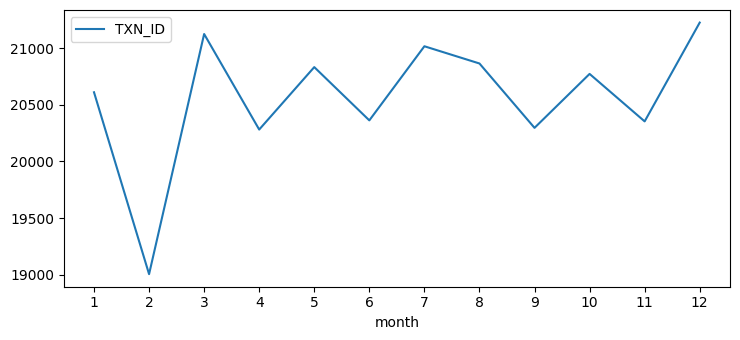

In [ ]:
from matplotlib import pyplot as plt, dates

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
transactions_month_group.plot(x='month', y='TXN_ID', kind="line")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# Display the plot
plt.show()

We can see that there is an increase in purchases in December and a break in late
December

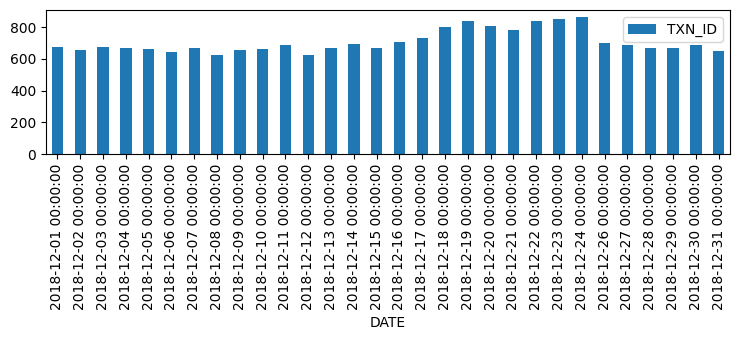

In [ ]:
# Filter to December and look at individual days
start_date = '2018-11-30'
end_date   = '2019-01-01'
dec_transaction = transactions_date_group.query('DATE > @start_date and DATE < @end_date')

#Plotting december transaction
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
dec_transaction.plot(x='DATE', y='TXN_ID', kind="bar")
# Display the plot
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.

In [ ]:
#move on to creating other features: brand of chips or pack size from PROD_NAME
#create packsize column
df_transactions['PACK_SIZE']=df_transactions['PROD_NAME'].str.extract('(\d+)').astype(int)
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,150


In [ ]:
#we need to check if the value for pack size is correct or not
df_transactions['PACK_SIZE'].min(), df_transactions['PACK_SIZE'].max()
#The largest size is 380g and the smallest size is 70g - seems sensible!

(70, 380)

<Axes: xlabel='PACK_SIZE'>

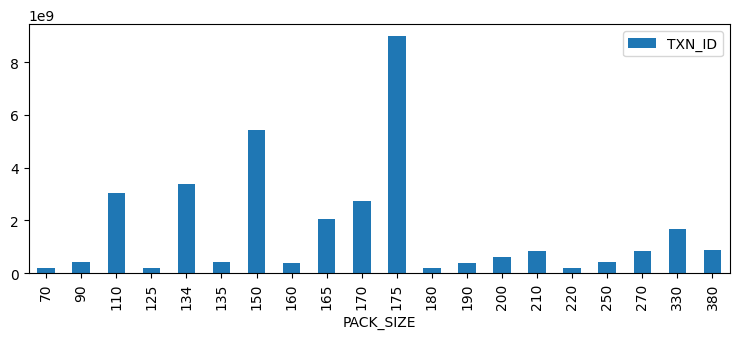

In [ ]:
# Plot a histogram showing the number of transactions by pack size
df_transactions.groupby('PACK_SIZE').agg({'TXN_ID':'sum'}).plot(kind='bar')
#Customers tend to buy packsize 175g - 150g - 110g

In [ ]:
# to create brands, we can use the first word in PROD_NAME to work out the brand name
df_transactions['BRAND']=df_transactions['PROD_NAME'].str.split(' ').str[0]
df_transactions['BRAND'].value_counts()

kettle        41288
smiths        27390
pringles      25102
doritos       22041
thins         14075
rrd           11894
infuzions     11057
ww            10320
cobs           9693
tostitos       9471
twisties       9454
tyrrells       6442
grain          6272
natural        6050
cheezels       4603
ccs            4551
red            4427
dorito         3183
infzns         3144
smith          2963
cheetos        2927
snbts          1576
burger         1564
woolworths     1516
grnwves        1468
sunbites       1432
ncc            1419
french         1418
Name: BRAND, dtype: int64

In [ ]:
# Some of the brand names look like they are of the same brands - such as RED and RRD,
#which are both Red Rock Deli chips
df_transactions['BRAND'].replace({'red': 'rrd', 'smith': 'smiths', 'infzns': 'infuzions', 'ww':'woolworths', 'natural':'ncc', 'dorito':'doritos','grnwves':'grain', 'snbts':'sunbites'}, inplace=True)
df_transactions['BRAND'].value_counts()

kettle        41288
smiths        30353
doritos       25224
pringles      25102
rrd           16321
infuzions     14201
thins         14075
woolworths    11836
cobs           9693
tostitos       9471
twisties       9454
grain          7740
ncc            7469
tyrrells       6442
cheezels       4603
ccs            4551
sunbites       3008
cheetos        2927
burger         1564
french         1418
Name: BRAND, dtype: int64

Examining customer dataset

In [ ]:
df_customers = pd.read_csv('QVI_purchase_behaviour.csv')
df_customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
#we check the shape of dataset
df_customers.shape

(72637, 3)

In [ ]:
#We want to understand the data type of each columns
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
#we check if all loyalty card number are unique value
df_customers.LYLTY_CARD_NBR.is_unique

True

In [ ]:
# we check if we have any null values
df_customers.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<Axes: >

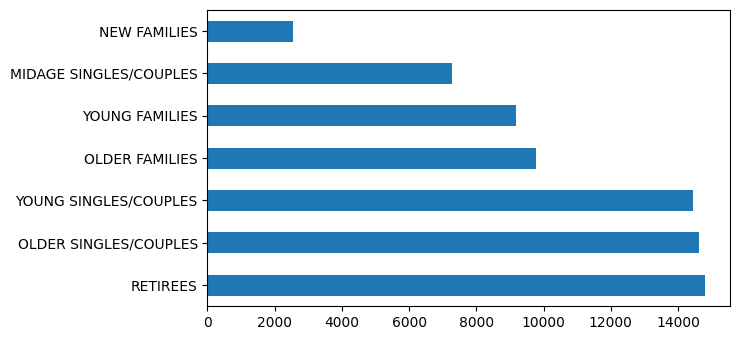

In [ ]:
#Observe number of customers per lifestage category
df_customers.LIFESTAGE.value_counts().plot(kind='barh')

<Axes: >

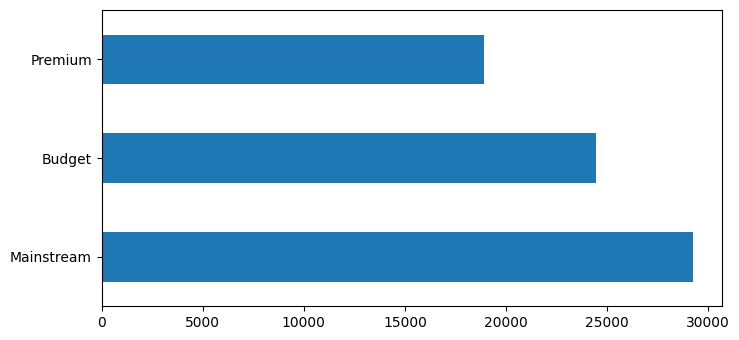

In [ ]:
#Observe number of customers per premium category
df_customers.PREMIUM_CUSTOMER.value_counts().plot(kind='barh')

 Merge transaction data to customer data

In [ ]:
df_cleaned_trans = pd.merge(df_transactions, df_customers, how='left', on='LYLTY_CARD_NBR')
df_cleaned_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,175,ncc,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3,175,ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,170,smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0,175,smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,150,kettle,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
# Let's also check if some customers were not matched on by checking for nulls.
df_cleaned_trans.isnull().sum()
# there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
#Save the final transaction merged file
df_cleaned_trans.to_csv('QVI_data.csv', index=False)

Step 2: Customer Segment Analysis

In [ ]:
df_cleaned_trans = pd.read_csv("QVI_data.csv")
df_cleaned_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,175,ncc,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3,175,ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,170,smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0,175,smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,150,kettle,MIDAGE SINGLES/COUPLES,Budget


Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.

In [ ]:
df_cleaned_trans.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"TOT_SALES":"sum"}).reset_index().sort_values(by='TOT_SALES', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


<Axes: xlabel='TOT_SALES', ylabel='LIFESTAGE'>

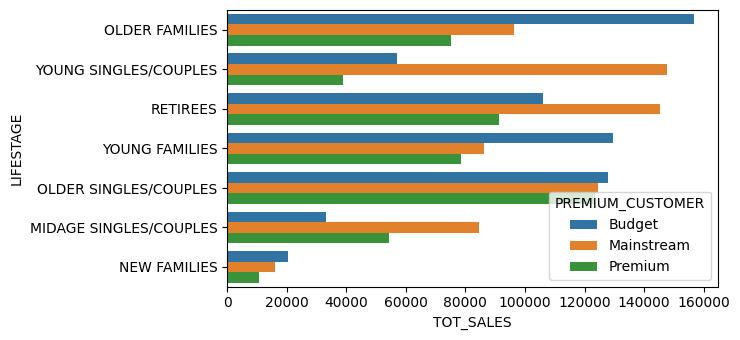

In [ ]:
import seaborn as sns
first_dimension = "LIFESTAGE"
second_dimension = "PREMIUM_CUSTOMER"
sns.barplot(x="TOT_SALES",
            y=first_dimension,
            hue=second_dimension,
            data=df_cleaned_trans.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"TOT_SALES":"sum"}).reset_index().sort_values(by='TOT_SALES', ascending=False))

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees

In [ ]:
# We want to check if the higher sales are due to there being more customers in that segment buy chips
df_cleaned_trans.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"LYLTY_CARD_NBR":"count"}).reset_index().sort_values(by='LYLTY_CARD_NBR', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
6,OLDER FAMILIES,Budget,21514
13,RETIREES,Mainstream,19970
19,YOUNG SINGLES/COUPLES,Mainstream,19544
15,YOUNG FAMILIES,Budget,17763
9,OLDER SINGLES/COUPLES,Budget,17172
10,OLDER SINGLES/COUPLES,Mainstream,17061
11,OLDER SINGLES/COUPLES,Premium,16560
12,RETIREES,Budget,14225
7,OLDER FAMILIES,Mainstream,13241
14,RETIREES,Premium,12236


<Axes: xlabel='LYLTY_CARD_NBR', ylabel='LIFESTAGE'>

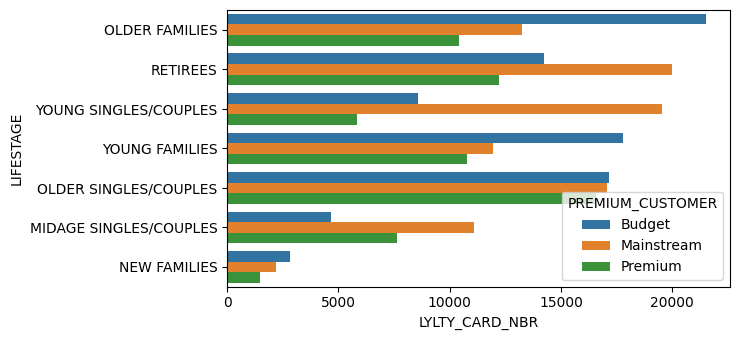

In [ ]:
first_dimension = "LIFESTAGE"
second_dimension = "PREMIUM_CUSTOMER"
sns.barplot(x="LYLTY_CARD_NBR",
            y=first_dimension,
            hue=second_dimension,
            data=df_cleaned_trans.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"LYLTY_CARD_NBR":"count"}).reset_index().sort_values(by='LYLTY_CARD_NBR', ascending=False))

There are more Budget - Older family,Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments. However, the number of Retirees-Mainstream customers are higher than Young singles/couples-mainstream

In [ ]:
# Higher sales may also be driven by more units of chips being bought per customer
df_groups = df_cleaned_trans.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"PROD_QTY":"sum","LYLTY_CARD_NBR":"count", 'TOT_SALES':'sum'}).reset_index()
df_groups['AVG_UNITS_PER_CUST'] = df_groups['PROD_QTY']/df_groups['LYLTY_CARD_NBR']
df_groups.sort_values(by='AVG_UNITS_PER_CUST', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,LYLTY_CARD_NBR,TOT_SALES,AVG_UNITS_PER_CUST
7,OLDER FAMILIES,Mainstream,25804,13241,96413.55,1.948795
8,OLDER FAMILIES,Premium,20239,10403,75242.60,1.945496
6,OLDER FAMILIES,Budget,41853,21514,156863.75,1.945384
16,YOUNG FAMILIES,Mainstream,23194,11947,86338.25,1.941408
15,YOUNG FAMILIES,Budget,34482,17763,129717.95,1.941226
17,YOUNG FAMILIES,Premium,20901,10784,78571.70,1.938149
9,OLDER SINGLES/COUPLES,Budget,32883,17172,127833.60,1.914920
11,OLDER SINGLES/COUPLES,Premium,31695,16560,123537.55,1.913949
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,11095,84734.25,1.911942
10,OLDER SINGLES/COUPLES,Mainstream,32607,17061,124648.50,1.911201


<Axes: xlabel='AVG_UNITS_PER_CUST', ylabel='LIFESTAGE'>

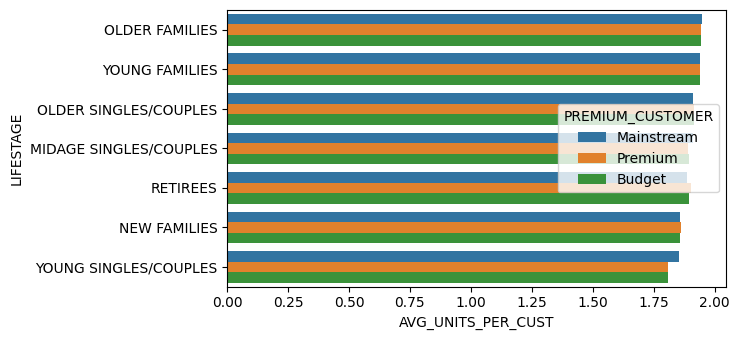

In [ ]:
first_dimension = "LIFESTAGE"
second_dimension = "PREMIUM_CUSTOMER"
sns.barplot(x="AVG_UNITS_PER_CUST",
            y=first_dimension,
            hue=second_dimension,
            data=df_groups.sort_values(by='AVG_UNITS_PER_CUST', ascending=False))

Older families and young families in general buy more chips per customer

In [ ]:
# Let’s also investigate the average price per unit chips bought for each customer segment
#as this is also a driver of total sales.
df_groups['AVG_PRICE_PER_UNIT'] = df_groups['TOT_SALES']/df_groups['PROD_QTY']
df_groups.sort_values(by='AVG_PRICE_PER_UNIT', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,LYLTY_CARD_NBR,TOT_SALES,AVG_UNITS_PER_CUST,AVG_PRICE_PER_UNIT
19,YOUNG SINGLES/COUPLES,Mainstream,36225,19544,147582.20,1.853510,4.074043
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,11095,84734.25,1.911942,3.994449
4,NEW FAMILIES,Mainstream,4060,2185,15979.70,1.858124,3.935887
12,RETIREES,Budget,26932,14225,105916.30,1.893286,3.932731
3,NEW FAMILIES,Budget,5241,2824,20607.45,1.855878,3.931969
14,RETIREES,Premium,23266,12236,91296.65,1.901438,3.924037
11,OLDER SINGLES/COUPLES,Premium,31695,16560,123537.55,1.913949,3.897698
9,OLDER SINGLES/COUPLES,Budget,32883,17172,127833.60,1.914920,3.887529
5,NEW FAMILIES,Premium,2769,1488,10760.80,1.860887,3.886168
13,RETIREES,Mainstream,37677,19970,145168.95,1.886680,3.852986


In [ ]:
df_groups.to_csv('first_chart.csv',index = False)

<Axes: xlabel='AVG_PRICE_PER_UNIT', ylabel='LIFESTAGE'>

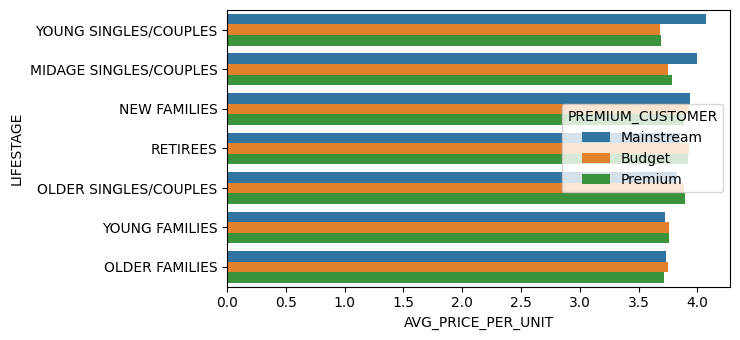

In [ ]:
first_dimension = "LIFESTAGE"
second_dimension = "PREMIUM_CUSTOMER"
sns.barplot(x="AVG_PRICE_PER_UNIT",
            y=first_dimension,
            hue=second_dimension,
            data=df_groups.sort_values(by='AVG_PRICE_PER_UNIT', ascending=False))

Mainstream midage and young singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.
As the difference in average price per unit isn’t large, we can check if this difference is statistically different.

In [ ]:
# The t-test quantifies the difference between the arithmetic means of the two samples.
from scipy import stats

# Filter the dataset for the two species we want to compare:
young_midage_mainstream = df_groups[(df_groups['PREMIUM_CUSTOMER'] == 'Mainstream') & ((df_groups['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(df_groups['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'))]
young_midage_notmainstream = df_groups[(df_groups['PREMIUM_CUSTOMER'] != 'Mainstream') & ((df_groups['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(df_groups['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'))]
# Extract the average price per unit for each segment:
young_midage_mainstream_price = young_midage_mainstream['AVG_PRICE_PER_UNIT']
young_midage_notmainstream_price = young_midage_notmainstream['AVG_PRICE_PER_UNIT']

# Perform the t-test:
t_stat, p_value = stats.ttest_ind(young_midage_mainstream_price, young_midage_notmainstream_price)

# Interpret the results:
alpha = 0.05
if p_value < alpha:
           print(f"p value: {round(p_value,3)} - Reject the null hypothesis; there is a significant difference between 2 segments.")
else:
  print(f"p value: {round(p_value,3)} -Fail to reject the null hypothesis; there is no significant difference between 2 segments.")

p value: 0.002 - Reject the null hypothesis; there is a significant difference between 2 segments.


We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at Mainstream - young singles/couples


Affinity Analysis or Market Basket Analysis is used to extract valuable insights from transaction data. Affinity Score represents the level of probability (%) that the customers in chosen segment will also use the brands listed in the table provided.

In [ ]:
#Check favorite brand of chips for Mainstream - young singles/couples
young_mainstream = df_cleaned_trans[(df_cleaned_trans['PREMIUM_CUSTOMER'] == 'Mainstream') & (df_cleaned_trans['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
other_segments = df_cleaned_trans[(df_cleaned_trans['PREMIUM_CUSTOMER'] != 'Mainstream') & (df_cleaned_trans['LIFESTAGE']!='YOUNG SINGLES/COUPLES')]

#Quantity by brand
brand_with_chosen_segment = young_mainstream.groupby("BRAND").agg({"PROD_QTY":"sum"}).reset_index().sort_values(by='PROD_QTY', ascending=False)
brand_with_not_chosen_segment = other_segments.groupby("BRAND").agg({"PROD_QTY":"sum"}).reset_index().sort_values(by='PROD_QTY', ascending=False)

#brand market shares
brand_with_chosen_segment['target_segment']=brand_with_chosen_segment['PROD_QTY']/sum(brand_with_chosen_segment['PROD_QTY'])
brand_with_not_chosen_segment['other_segment']=brand_with_not_chosen_segment['PROD_QTY']/sum(brand_with_not_chosen_segment['PROD_QTY'])

#we merge 2 dataset of chosen segment and other segments using brand column
brand_info = pd.merge(brand_with_chosen_segment[['BRAND','target_segment']],brand_with_not_chosen_segment[['BRAND','other_segment']],on='BRAND')
brand_info['affinityToBrand'] = brand_info['target_segment']/brand_info['other_segment']
brand_info.sort_values(by='affinityToBrand', ascending=False)

,BRAND,target_segment,other_segment,affinityToBrand
11,tyrrells,0.031553,0.025715,1.227025
6,twisties,0.046184,0.037933,1.217506
1,doritos,0.122761,0.101171,1.213397
0,kettle,0.197985,0.166560,1.188667
7,tostitos,0.045411,0.038350,1.184100
2,pringles,0.119420,0.101110,1.181090
8,cobs,0.044638,0.038449,1.160959
4,infuzions,0.064679,0.057410,1.126622
5,thins,0.060373,0.057159,1.056217
10,grain,0.032712,0.031069,1.052895


In [ ]:
brand_info.to_csv('second_chart.csv', index = False)

Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population - and they less likely to purchase Burger Rings compared to the rest of the population

In [ ]:
# Let’s also find out if our target segment tends to buy larger packs of chips.
#Check favorite package size of chips for Mainstream - young singles/couples
#Quantity by package
package_with_chosen_segment = young_mainstream.groupby("PACK_SIZE").agg({"PROD_QTY":"sum"}).reset_index().sort_values(by='PROD_QTY', ascending=False)
package_with_not_chosen_segment = other_segments.groupby("PACK_SIZE").agg({"PROD_QTY":"sum"}).reset_index().sort_values(by='PROD_QTY', ascending=False)

#package market shares
package_with_chosen_segment['target_segment']=package_with_chosen_segment['PROD_QTY']/sum(package_with_chosen_segment['PROD_QTY'])
package_with_not_chosen_segment['other_segment']=package_with_not_chosen_segment['PROD_QTY']/sum(package_with_not_chosen_segment['PROD_QTY'])

#we merge 2 dataset of chosen segment and other segments using brand column
package_info = pd.merge(package_with_chosen_segment[['PACK_SIZE','target_segment']],package_with_not_chosen_segment[['PACK_SIZE','other_segment']],on='PACK_SIZE')
package_info['affinityToBrand'] = package_info['target_segment']/package_info['other_segment']
package_info.sort_values(by='affinityToBrand', ascending=False)

,PACK_SIZE,target_segment,other_segment,affinityToBrand
8,270,0.031829,0.025070,1.269608
7,380,0.032160,0.025711,1.250827
5,330,0.061284,0.050974,1.202243
3,110,0.106280,0.089575,1.186492
2,134,0.119420,0.101110,1.181090
9,210,0.029124,0.024891,1.170020
10,135,0.014769,0.012931,1.142086
11,250,0.014355,0.012863,1.115959
4,170,0.080773,0.080347,1.005300
1,150,0.157598,0.163070,0.966449


In [ ]:
package_info.to_csv('third_chart.csv', index = False)

It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population

In [ ]:
#Let's find out which brands sell this package size
df_cleaned_trans[df_cleaned_trans.PACK_SIZE==270][['PROD_NAME','BRAND']].value_counts()

PROD_NAME             BRAND   
twisties chicken270g  twisties    3170
twisties cheese 270g  twisties    3115
dtype: int64

Twisties are the only brand offering 270g packs with 2 products: twisties chicken and twisties cheese - so this may instead be reflecting a higher likelihood of purchasing Twisties.

- Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers.
- We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers.
- Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
- We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
